In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("../data/churn.csv")

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [6]:
df.drop("CustomerID", axis=1, inplace=True)

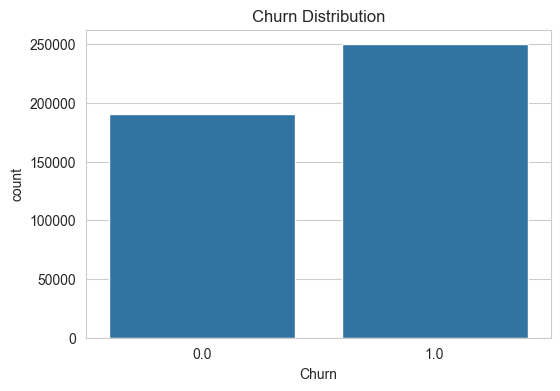

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.savefig("../assets/churn_distribution.png")
plt.show()

Churn Distribution Insight

The dataset shows the proportion of customers who have churned versus those who stayed.

If churned customers are fewer, it indicates class imbalance, which needs to be handled carefully during model training.

This insight helps in selecting appropriate evaluation metrics like F1-score instead of accuracy.

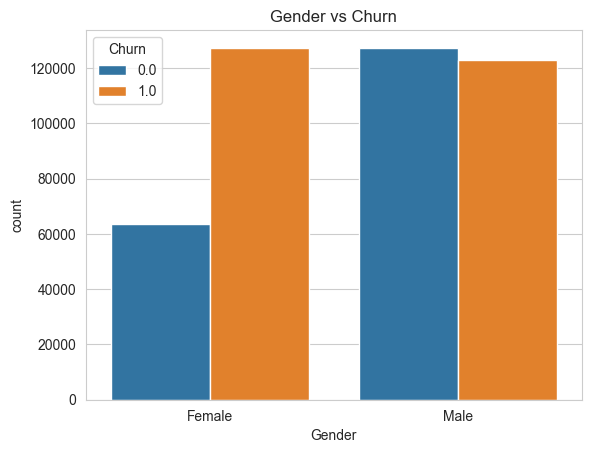

In [8]:
sns.countplot(x="Gender", hue="Churn", data=df)
plt.title("Gender vs Churn")
plt.savefig("../assets/gender_vs_churn.png")
plt.show()

Gender vs Churn Insight

The comparison between gender and churn indicates whether churn behavior differs across genders.

If the churn rate is similar, gender may not be a strong predictor.
If different, it can be an important feature in the model.

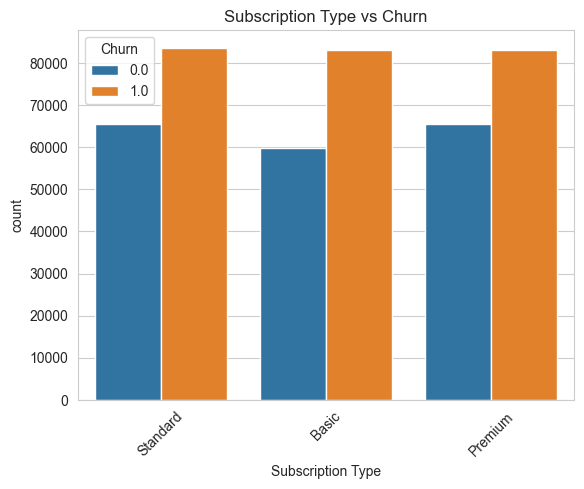

In [9]:
sns.countplot(x="Subscription Type", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Subscription Type vs Churn")
plt.savefig("../assets/subscription_vs_churn.png")
plt.show()

Subscription Type Insight

Different subscription plans show varying churn rates.

This suggests that pricing or features of certain plans may not be meeting customer expectations.

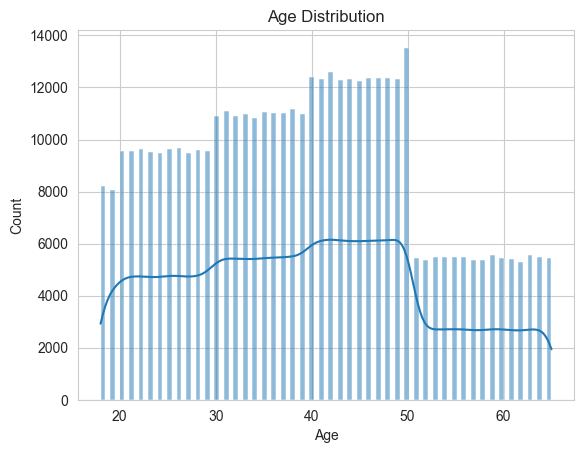

In [10]:
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.savefig("../assets/age_distribution.png")
plt.show()

Age Distribution Insight

The age distribution shows that most customers fall within a certain age range.

This helps understand the target customer segment and whether age plays a role in churn behavior.

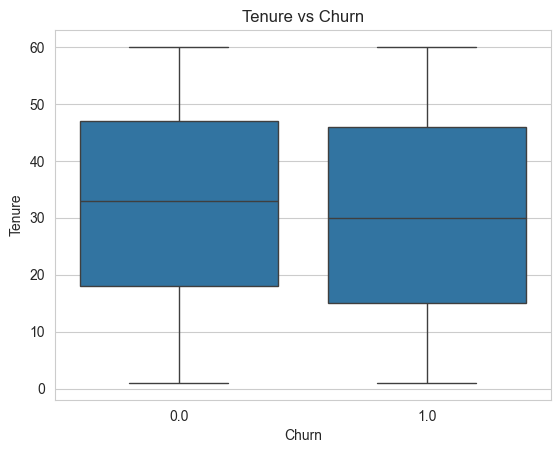

In [11]:
sns.boxplot(x="Churn", y="Tenure", data=df)
plt.title("Tenure vs Churn")
plt.savefig("../assets/tenure_vs_churn.png")
plt.show()

Tenure vs Churn Insight

Customers with lower tenure are more likely to churn compared to long-term customers.

This suggests that new customers are at higher risk, and companies should focus on improving early customer experience.

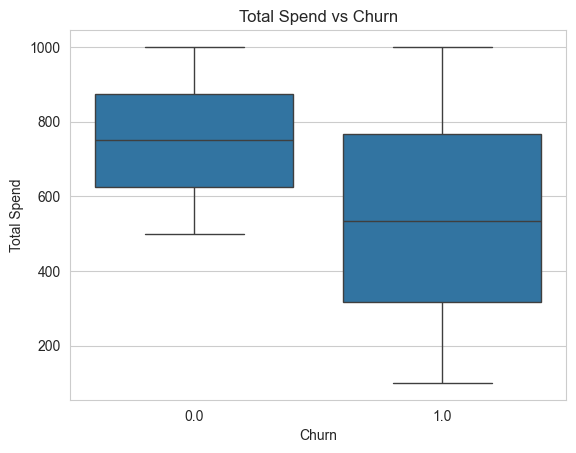

In [12]:
sns.boxplot(x="Churn", y="Total Spend", data=df)
plt.title("Total Spend vs Churn")
plt.savefig("../assets/spend_vs_churn.png")
plt.show()

Total Spend Insight

Customers who spend more tend to churn less.

This indicates that high-value customers are more loyal and should be prioritized for retention strategies.

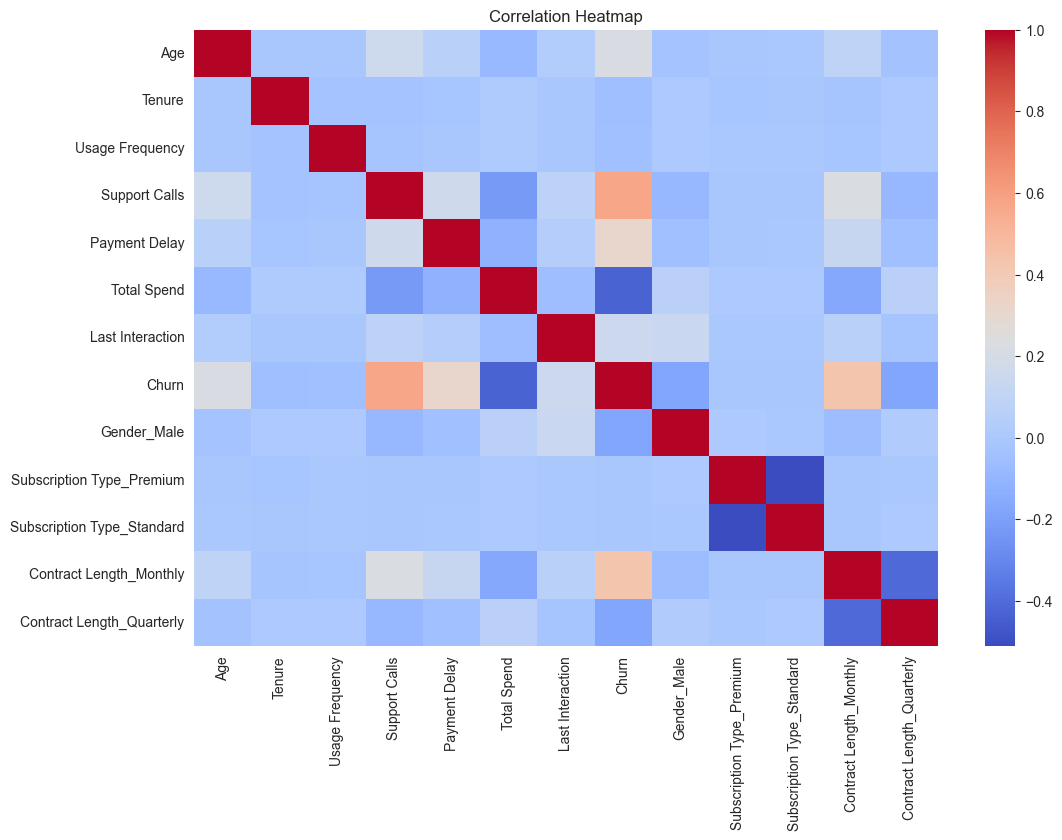

In [13]:
# Convert categorical to numeric temporarily
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("../assets/correlation_heatmap.png")
plt.show()

Correlation Insight

The heatmap shows relationships between features.

Highly correlated features may influence churn significantly and are important for model training.

In [14]:
df_encoded["Churn"].isnull().sum()

np.int64(1)

In [15]:
df_encoded = df_encoded.dropna(subset=["Churn"])

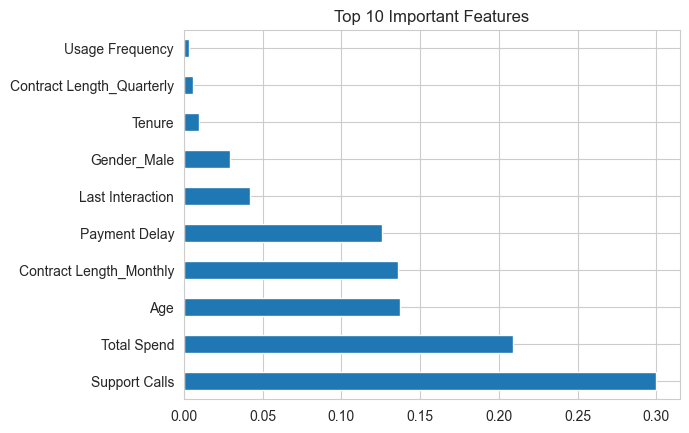

In [16]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_

feat_importance = pd.Series(importances, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')

plt.title("Top 10 Important Features")
plt.savefig("../assets/feature_importance.png")
plt.show()

Key Insights:

1. Customers with low tenure are more likely to churn
2. Higher support calls indicate dissatisfaction
3. Subscription type affects churn rate significantly
4. High total spend customers are more loyal